In [12]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from gensim import corpora 
from gensim import models
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import matplotlib.font_manager as fm 
fm.get_fontconfig_fonts() 

from konlpy.tag import Kkma
from konlpy.utils import pprint

from tqdm import tqdm

font_loaction = 'C:/Users/User/Desktop/NANUMGOTHIC-BOLD.ttf'

C:\Users\user\AppData\Local\Temp\ipykernel_10132\3396413375.py:13: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [9]:
df = pd.read_csv('C:/Users/User/github/Web_Crawling/save_data/2022-01_stock.csv')

In [13]:
kkma = Kkma()

In [15]:
line = []
for i in tqdm(range(len(df))):
    a = df.iloc[:,1][i]
    k = kkma.nouns(a)
    z = [u for u in k if len(u) > 1] 
    line.append(z)


100%|██████████| 4994/4994 [01:47<00:00, 46.46it/s]


In [16]:
dictionary = corpora.Dictionary(line)                    # 사전 생성 (토큰화)
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in line]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

Dictionary<13849 unique tokens: ['11', '15', '24', '28', '32']...>
corpus : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(2, 1), (23, 1), (50, 1), (51, 1)], [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(23, 1), (49, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)], [(82, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1

In [17]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=21, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
	pprint(t)

(4,
 '0.019*"급락" + 0.013*"금융" + 0.011*"국민" + 0.011*"연금" + 0.011*"비트" + 0.010*"삼성" '
 '+ 0.009*"네이버" + 0.009*"달성" + 0.009*"시장" + 0.009*"종합"')
(2,
 '0.018*"상장" + 0.013*"증시" + 0.011*"긴축" + 0.010*"투자" + 0.009*"코스" + 0.009*"지분" '
 '+ 0.008*"자산" + 0.008*"금리" + 0.008*"주가" + 0.007*"폐지"')
(10,
 '0.033*"지난해" + 0.032*"영업" + 0.013*"주가" + 0.011*"베트남" + 0.010*"지수" + '
 '0.009*"투자자" + 0.008*"증가" + 0.008*"성장" + 0.008*"이것" + 0.008*"증시"')
(13,
 '0.064*"증시" + 0.036*"상승" + 0.029*"마감" + 0.026*"뉴욕" + 0.018*"실적" + 0.017*"코스" '
 '+ 0.016*"뉴욕증시" + 0.015*"반등" + 0.014*"나스닥" + 0.014*"하락"')
(5,
 '0.016*"코스" + 0.016*"작년" + 0.014*"달러" + 0.014*"200" + 0.012*"전년" + 0.011*"영업" '
 '+ 0.011*"주식" + 0.010*"시세" + 0.010*"지수" + 0.010*"선물"')
(0,
 '0.026*"이익" + 0.022*"사상" + 0.019*"작년" + 0.019*"영업" + 0.019*"코스" + 0.015*"엔솔" '
 '+ 0.015*"폭락" + 0.013*"최대" + 0.011*"상장" + 0.011*"사상최대"')
(7,
 '0.038*"매수" + 0.029*"기관" + 0.029*"외국인" + 0.027*"종목" + 0.026*"개인" + 0.025*"코스" '
 '+ 0.024*"코스피" + 0.020*"코스닥" + 0.016*"삼성" + 0.015*"순매도"')
(17,

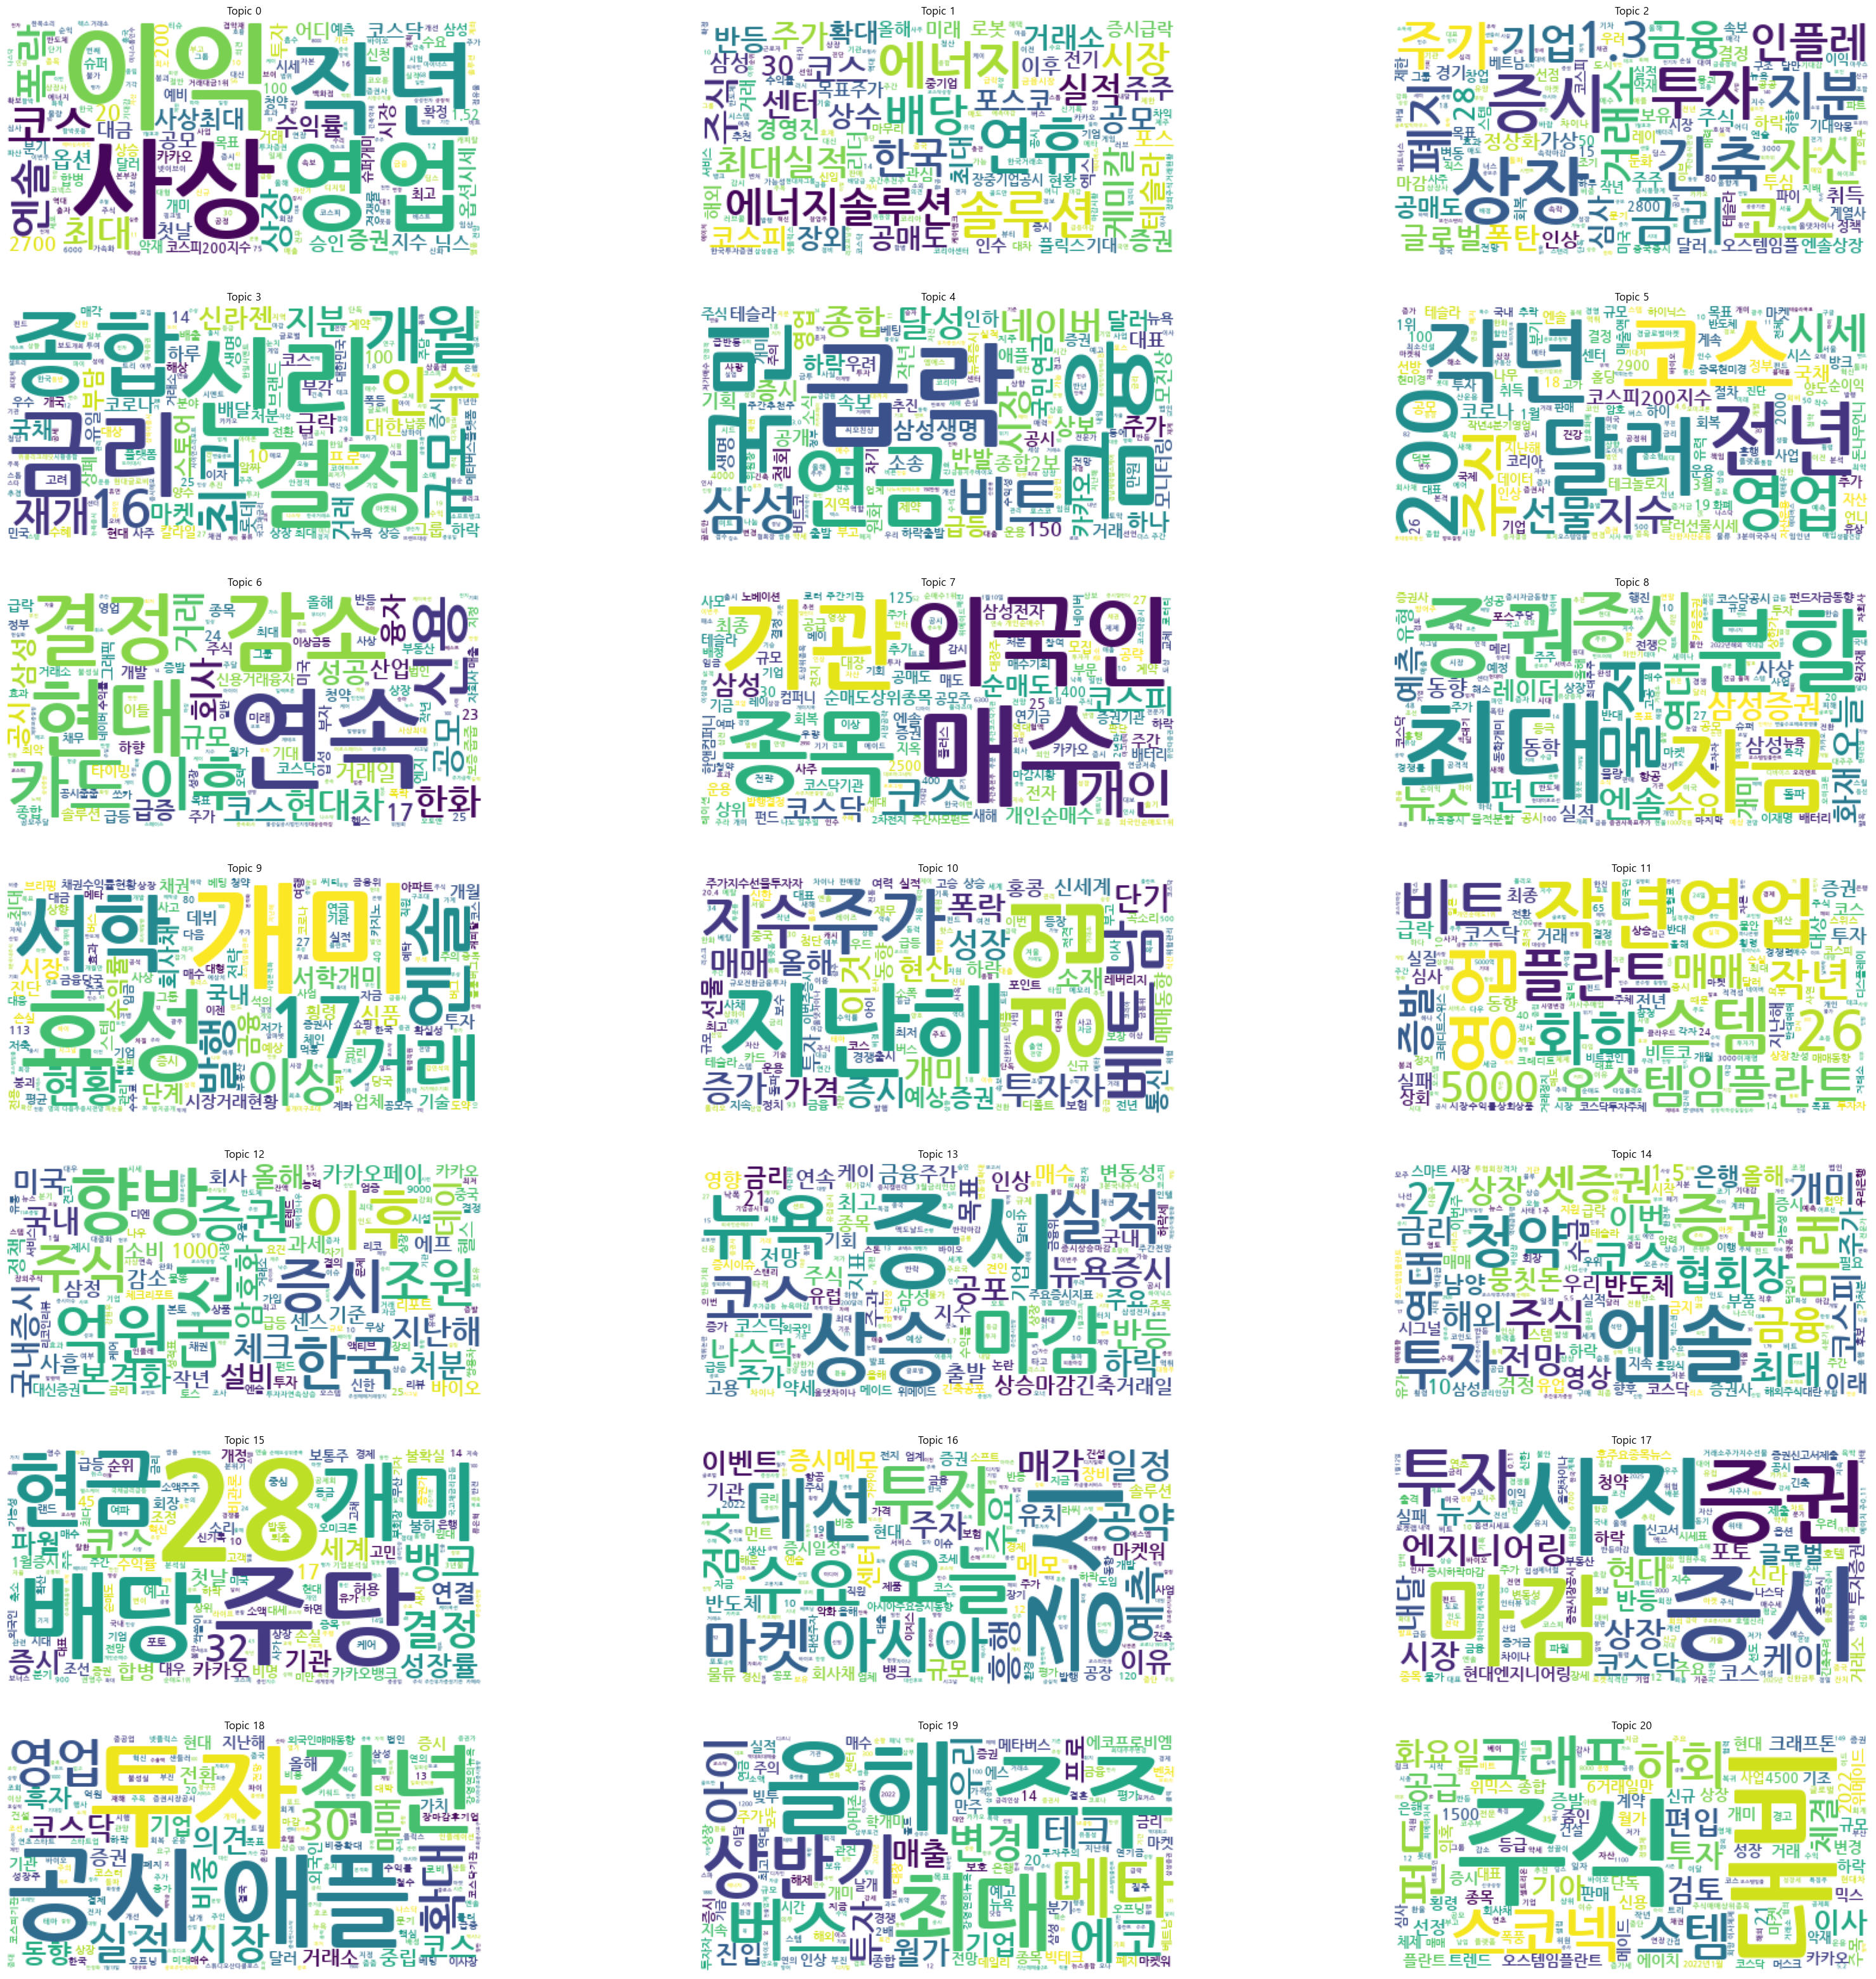

In [18]:
wc = WordCloud(background_color='white', font_path=font_loaction)            # 워드클라우드

plt.figure(figsize=(40,40))
for t in range(lda.num_topics):
    plt.subplot(7,3,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic " + str(t))


In [20]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [21]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [22]:
num_topics = 21
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2023-01-11 09:56:05,780 : INFO : using autotuned alpha, starting with [0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905, 0.04761905]
2023-01-11 09:56:05,782 : INFO : using serial LDA version on this node
2023-01-11 09:56:05,801 : INFO : running online (multi-pass) LDA training, 21 topics, 20 passes over the supplied corpus of 4994 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2023-01-11 09:56:05,802 : INFO : PROGRESS: pass 0, at document #2000/4994
2023-01-11 09:56:06,242 : INFO : optimized alpha [0.044833314, 0.04292296, 0.04332675, 0.043509282, 0.043784786, 0.043695804, 0.042731605, 0.043369286, 0.044022158, 0.043720603, 0.043539353, 0.043432973, 0.04305852, 0.043775607, 0.043352082, 0.042980295

In [23]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2023-01-11 09:56:17,521 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2023-01-11 09:56:17,524 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2023-01-11 09:56:17,528 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2023-01-11 09:56:17,532 : INFO : CorpusAccumulator accumulated stats from 4000 documents


Average topic coherence: -14.1839.
[([(0.034992006, '기관'),
   (0.03483668, '외국인'),
   (0.02816792, '매수'),
   (0.02779667, '코스닥'),
   (0.027157225, '동향'),
   (0.026210152, '종목'),
   (0.025105195, '코스'),
   (0.019570382, '개인'),
   (0.01948925, '매매'),
   (0.017365497, '30'),
   (0.01725987, '최종'),
   (0.01577612, '증권'),
   (0.013835218, '상승'),
   (0.012636, '코스피'),
   (0.01219628, '증시'),
   (0.012005858, '개인순매수'),
   (0.011232244, '상위'),
   (0.010397483, '마감'),
   (0.009868896, '순매도'),
   (0.009762219, '투자')],
  -6.991353778435302),
 ([(0.04583728, '삼성'),
   (0.04095395, '실적'),
   (0.033776265, '전망'),
   (0.028306838, '올해'),
   (0.023373267, '증권'),
   (0.022808276, '전자'),
   (0.018616216, '반도체'),
   (0.018430343, '반등'),
   (0.017922506, '삼성전자'),
   (0.015597942, '주가'),
   (0.015212377, '카카오'),
   (0.01483103, '증시'),
   (0.01408627, '증발'),
   (0.012590266, '이익'),
   (0.012398862, '네이버'),
   (0.011107306, '대신'),
   (0.0106287645, '삼성증권'),
   (0.00983041, '금융'),
   (0.009417492, '실패'),
   (0

In [24]:
top_topics[1]

([(0.04583728, '삼성'),
  (0.04095395, '실적'),
  (0.033776265, '전망'),
  (0.028306838, '올해'),
  (0.023373267, '증권'),
  (0.022808276, '전자'),
  (0.018616216, '반도체'),
  (0.018430343, '반등'),
  (0.017922506, '삼성전자'),
  (0.015597942, '주가'),
  (0.015212377, '카카오'),
  (0.01483103, '증시'),
  (0.01408627, '증발'),
  (0.012590266, '이익'),
  (0.012398862, '네이버'),
  (0.011107306, '대신'),
  (0.0106287645, '삼성증권'),
  (0.00983041, '금융'),
  (0.009417492, '실패'),
  (0.009286149, '카드')],
 -10.738607715702944)

In [139]:
top_topics[2]

([(0.10467598, '코스'),
  (0.03864952, '코스피'),
  (0.022225764, '마감'),
  (0.020899072, '증시'),
  (0.016005494, '반등'),
  (0.015332926, '200'),
  (0.014856202, '기관'),
  (0.014844373, '매수'),
  (0.0144607965, '상승'),
  (0.014341215, '코스닥'),
  (0.014204565, '주요'),
  (0.013228756, '주간'),
  (0.012503876, '시세'),
  (0.012279564, '지수'),
  (0.011549825, '종목'),
  (0.011295318, '하락'),
  (0.01064132, '코스피200지수'),
  (0.009515072, '포토'),
  (0.009342076, '매도'),
  (0.009199665, '회복')],
 -9.926017183151544)

In [140]:
top_topics[3]

([(0.043293174, '종목'),
  (0.040853772, '기관'),
  (0.039591946, '매수'),
  (0.030991537, '개인'),
  (0.029496372, '외국인'),
  (0.020912886, '최종'),
  (0.020821473, '개인순매수'),
  (0.019479962, '상위'),
  (0.01686747, '순매도'),
  (0.015239949, '순매도상위종목'),
  (0.014050389, '효성'),
  (0.012196644, '코스닥'),
  (0.011868439, '증권'),
  (0.009052822, '코스닥기관'),
  (0.009052822, '증권기관'),
  (0.008966833, '업체'),
  (0.008768897, '18'),
  (0.008314807, '평가'),
  (0.007909162, '검토'),
  (0.0074649886, '소재')],
 -10.484358525116306)

In [141]:
top_topics[4]

([(0.063651755, '스템'),
  (0.038175717, '플란트'),
  (0.03730401, '오스템임플란트'),
  (0.025718866, '횡령'),
  (0.020844668, '배당'),
  (0.019194392, '수익률'),
  (0.017159881, '심사'),
  (0.014440775, '결정'),
  (0.013612456, '상장'),
  (0.012520743, '24'),
  (0.011409711, '주주'),
  (0.011327324, '메이드'),
  (0.011137729, '오스템임플'),
  (0.010801062, '개미'),
  (0.01057096, '주당'),
  (0.01046198, '대상'),
  (0.01018217, '여부'),
  (0.009844486, '직원'),
  (0.00951952, '펀드'),
  (0.009438678, '위메이드')],
 -11.64816372687611)

In [26]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
#pyLDAvis.save_html(lda_visualization, 'file_name.html')

c:\Users\user\anaconda3\envs\crawling\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [27]:
pyLDAvis.display(lda_visualization)